In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import PIL 

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)
# get_file downloads the file from url to defined directory and cache_dir is refering to where to store
#untar means unzip

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib  #for glob and np array operation its need to be in windowed form
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]
#glob module is used to retrieve files/pathnames matching a specified pattern

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

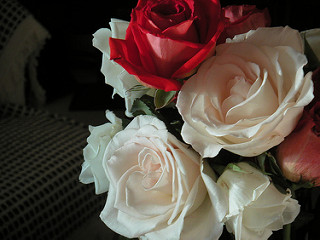

In [8]:
PIL.Image.open(roses[1])

In [9]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

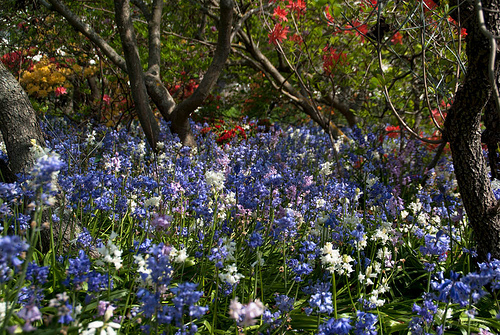

In [10]:
PIL.Image.open(tulips[1])

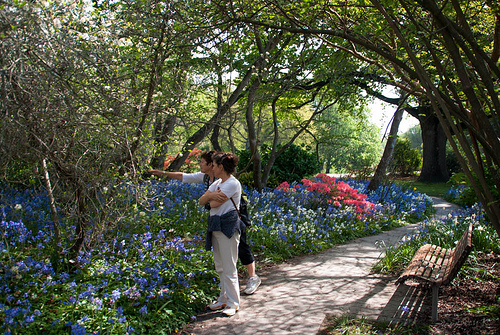

In [11]:
PIL.Image.open(tulips[2])

Read flowers images from disk into numpy array using opencv


In [12]:
flower_img_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flower_label_dict={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flower_img_dict['roses'][0:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [15]:
img=cv2.imread(str(flower_img_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
img.shape

(240, 179, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flower_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])

In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [31]:
y_train[:5]

array([4, 1, 1, 0, 4])

In [22]:
num_classes = 5

model = keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
92/92 [==============================] - 89s 685ms/step - loss: 1.3954 - accuracy: 0.4097
Epoch 2/10
92/92 [==============================] - 61s 663ms/step - loss: 1.0258 - accuracy: 0.6018
Epoch 3/10
92/92 [==============================] - 61s 662ms/step - loss: 0.8533 - accuracy: 0.6710
Epoch 4/10
92/92 [==============================] - 61s 668ms/step - loss: 0.6988 - accuracy: 0.7466
Epoch 5/10
92/92 [==============================] - 62s 678ms/step - loss: 0.4928 - accuracy: 0.8208
Epoch 6/10
92/92 [==============================] - 61s 659ms/step - loss: 0.3114 - accuracy: 0.8924
Epoch 7/10
92/92 [==============================] - 61s 658ms/step - loss: 0.1654 - accuracy: 0.9472
Epoch 8/10
92/92 [==============================] - 63s 685ms/step - loss: 0.1247 - accuracy: 0.9642
Epoch 9/10
92/92 [==============================] - 67s 722ms/step - loss: 0.0633 - accuracy: 0.9826
Epoch 10/10
92/92 [==============================] - 61s 660ms/step - loss: 0.0399 - accura

In [23]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 6s 221ms/step - loss: 1.8388 - accuracy: 0.6349


[1.838847041130066, 0.6348773837089539]

In [24]:
y_pred=model.predict(X_test_scaled)
y_pred

array([[ 14.841102  ,  -4.784589  , -12.331975  ,  -8.909423  ,
         18.573805  ],
       [ -3.5795124 ,  -4.1996055 ,  15.775127  ,   7.1782327 ,
          3.6732647 ],
       [ -0.1781096 ,   7.2602987 ,   0.39209187,   0.3957042 ,
          3.395107  ],
       ...,
       [ -5.1024394 ,   2.8183262 ,   6.690828  ,   6.827248  ,
          2.550036  ],
       [  5.185675  ,   6.6247416 ,  -1.3533791 ,   2.0358841 ,
          1.0579518 ],
       [  1.0068014 ,  -4.10536   ,  11.870253  ,   3.398268  ,
          4.11188   ]], dtype=float32)

In [25]:
score=tf.nn.softmax(y_pred[0])

In [26]:
np.argmax(score)

4

In [27]:
y_test[0]

4

Improve Test Accuracy Using Data Augmentation


In [28]:
data_aug=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal'
                            ,input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

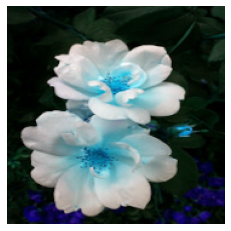

In [29]:
plt.axis('off')
plt.imshow(X[0])

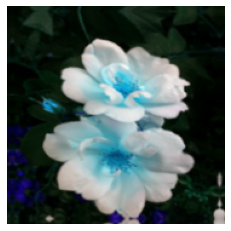

In [30]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer


In [32]:
num_classes = 5

model = keras.Sequential([
  data_aug,  
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
92/92 [==============================] - 64s 672ms/step - loss: 1.4699 - accuracy: 0.3808
Epoch 2/10
92/92 [==============================] - 60s 650ms/step - loss: 1.1172 - accuracy: 0.5351
Epoch 3/10
92/92 [==============================] - 61s 665ms/step - loss: 1.0034 - accuracy: 0.5971
Epoch 4/10
92/92 [==============================] - 61s 667ms/step - loss: 0.9399 - accuracy: 0.6253
Epoch 5/10
92/92 [==============================] - 61s 659ms/step - loss: 0.8741 - accuracy: 0.6669
Epoch 6/10
92/92 [==============================] - 60s 655ms/step - loss: 0.8195 - accuracy: 0.6853
Epoch 7/10
92/92 [==============================] - 59s 638ms/step - loss: 0.7503 - accuracy: 0.7088
Epoch 8/10
92/92 [==============================] - 59s 642ms/step - loss: 0.7489 - accuracy: 0.7088
Epoch 9/10
92/92 [==============================] - 59s 640ms/step - loss: 0.7208 - accuracy: 0.7302
Epoch 10/10
92/92 [==============================] - 59s 638ms/step - loss: 0.6844 - accura

In [33]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 4s 153ms/step - loss: 0.7834 - accuracy: 0.7003


[0.7834489941596985, 0.7002725005149841]